In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [5]:
# build the dataset
block_size = 3

def build_dataset(words):  
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y


In [6]:
import random
random.shuffle(words)
n = int(0.8*len(words))

Xtr, Ytr = build_dataset(words[:n])
Xte, Yte = build_dataset(words[n:])


torch.Size([182568, 3]) torch.Size([182568])
torch.Size([45578, 3]) torch.Size([45578])


In [7]:
Xtr.shape, Ytr.shape

(torch.Size([182568, 3]), torch.Size([182568]))

In [8]:
g = torch.Generator()
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [9]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [10]:
for p in parameters:
  p.requires_grad = True

In [11]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [12]:
lri = []
lossi = []
stepi = []

In [13]:
for i in range(20000):
  
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) 
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  lr = 0.1 if i < 10000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.item())
  print(loss.item())


25.729877471923828
23.724206924438477
23.525474548339844
21.564409255981445
18.288957595825195
20.014511108398438
21.792394638061523
20.541061401367188
19.029582977294922
16.795093536376953
20.1264705657959
14.814273834228516
12.954458236694336
17.394634246826172
16.781713485717773
15.138171195983887
12.71817684173584
15.841517448425293
15.89905071258545
15.326422691345215
15.703694343566895
16.54415512084961
17.09980010986328
12.679234504699707
14.867527961730957
13.989450454711914
12.607279777526855
13.025749206542969
13.459519386291504
13.407855033874512
11.847636222839355
10.53880500793457
11.651333808898926
13.477474212646484
15.16911506652832
12.301578521728516
14.852069854736328
16.172800064086914
14.0432710647583
11.656285285949707
10.1619234085083
10.716564178466797
14.195380210876465
11.354247093200684
9.967044830322266
10.677366256713867
12.08295726776123
9.457319259643555
11.110835075378418
11.41559886932373
11.55447769165039
11.501378059387207
9.608076095581055
14.15118503

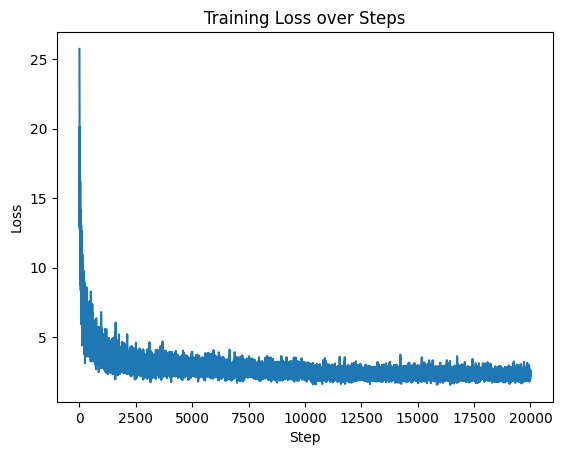

In [14]:
plt.plot(stepi, lossi)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss over Steps')
plt.show()

In [15]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3103, grad_fn=<NllLossBackward0>)

In [16]:
emb = C[Xte]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.3405, grad_fn=<NllLossBackward0>)

In [17]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [18]:
g = torch.Generator()

for _ in range(20):
    
    out = []
    context = [0] * block_size
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

cebiloe.
fhe.
hyn.
yeah.
gevyaier.
dikrakie.
maiel.
lilaniraahloy.
miabliyliannlera.
nirianibary.
hevia.
cyre.
vaaryly.
moria.
liis.
avila.
caxaelyn.
gun.
nel.
zanius.
